In [0]:
import numpy as np
import matplotlib.pyplot as plt

"""
I want to create timeseries data with some templates.
My intention is to generate different patterns on work on trends and stationary data.

Below ,I copy some definitions from internet.
A stationary time series is one whose properties do not depend on the time at which the series is observed.
Thus, time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times. 
On the other hand, a white noise series is stationary — it does not matter when you observe it, it should look much the same at any point in time.

Time series are stationary if they do not have trend or seasonal effects.
 Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.

In general, a stationary time series will have no predictable patterns in the long-term. 
Time plots will show the series to be roughly horizontal (although some cyclic behaviour is possible), with constant variance. 
"""

def plot_series(serie,label):
  plt.plot(serie)
  plt.ylabel(label)
  plt.show()

#the stationary process reverts around a constant long-term mean and has a constant variance independent of time.
#drift (a slow steady change)
#deterministic trends (trends that are constant, positive or negative, independent of time for the whole life of the series)
def f_stationary(x,factor,sample_size):
  items = []
  for i in range(sample_size):
    x = x * factor
    items.append(x)
  return np.array(items)

#Yt = Yt-1 + εt    
def pure_random_walk(begin,variance,sample_size):
  items = []
  x = begin
  for i in range(sample_size):
    noise = (np.random.randint(variance * -10,variance * 10, size=1)/10)[0]
    x = x + noise
    items.append(x)
  return np.array(items)  

#Yt = α + Yt-1 + εt 
def random_walk_with_drift(begin,variance,sample_size,drift):
  items = []
  x = begin
  for i in range(sample_size):
    noise = (np.random.randint(variance * -10,variance * 10, size=1)/10)[0]
    x = x + drift + noise
    items.append(x)
  return np.array(items)  

#Yt = α + βt + εt
def deterministic_trend(begin,variance,sample_size,drift,trend):
  items = []
  x = begin
  for i in range(sample_size):
    noise = (np.random.randint(variance * -10,variance * 10, size=1)/10)[0]
    x =  i * trend + noise + drift
    items.append(x)
  return np.array(items)    

#Random Walk with Drift and Deterministic Trend (Yt = α + Yt-1 + βt + εt ) 
def deterministic_trend_random_walk(begin,variance,sample_size,drift,trend):
  items = []
  x = begin
  for i in range(sample_size):
    noise = (np.random.randint(variance * -10,variance * 10, size=1)/10)[0]
    x =  x + i * trend + noise + drift
    items.append(x)
  return np.array(items)    


 

A trending mean is a common violation of stationarity. There are two popular models for nonstationary series with a trending mean.

    Trend stationary: The mean trend is deterministic. Once the trend is estimated and removed from the data, the residual series is a stationary stochastic process.

    Difference stationary: The mean trend is stochastic. Differencing the series D times yields a stationary stochastic process.

The distinction between a deterministic and stochastic trend has important implications for the long-term behavior of a process:

    Time series with a deterministic trend always revert to the trend in the long run (the effects of shocks are eventually eliminated). Forecast intervals have constant width.

    Time series with a stochastic trend never recover from shocks to the system (the effects of shocks are permanent). Forecast intervals grow over time.

Unfortunately, for any finite amount of data there is a deterministic and stochastic trend that fits the data equally well (Hamilton, 1994). Unit root tests are a tool for assessing the presence of a stochastic trend in an observed series.

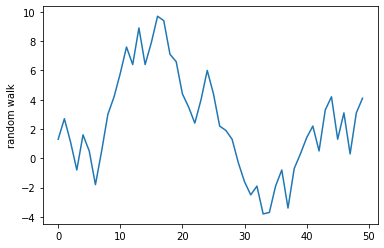

array([ 1.3,  2.7,  1.1, -0.8,  1.6,  0.5, -1.8,  0.5,  3. ,  4.2,  5.8,
        7.6,  6.4,  8.9,  6.4,  7.9,  9.7,  9.4,  7.1,  6.6,  4.4,  3.5,
        2.4,  4. ,  6. ,  4.4,  2.2,  1.9,  1.3, -0.3, -1.6, -2.5, -1.9,
       -3.8, -3.7, -1.9, -0.8, -3.4, -0.7,  0.3,  1.4,  2.2,  0.5,  3.3,
        4.2,  1.3,  3.1,  0.3,  3.1,  4.1])

In [17]:
sample_size = 50
random_walk_set = pure_random_walk(4,3,sample_size)
plot_series(random_walk_set,"random walk")
random_walk_set

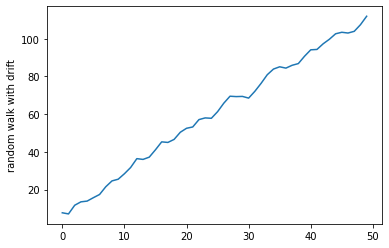

array([  7.7,   7.1,  11.7,  13.5,  13.9,  15.7,  17.4,  21.5,  24.6,
        25.5,  28.4,  31.7,  36.4,  36. ,  37.2,  41.1,  45.3,  45. ,
        46.6,  50.4,  52.5,  53.2,  57.1,  58. ,  57.8,  61.3,  65.8,
        69.5,  69.3,  69.4,  68.5,  72.1,  76.3,  80.9,  83.9,  85.1,
        84.4,  85.9,  86.8,  90.7,  94.1,  94.3,  97.3,  99.7, 102.6,
       103.4, 103. , 103.9, 107.4, 111.9])

In [18]:
random_with_drift_set = random_walk_with_drift(4,3,sample_size,2)
plot_series(random_with_drift_set,"random walk with drift")
random_with_drift_set

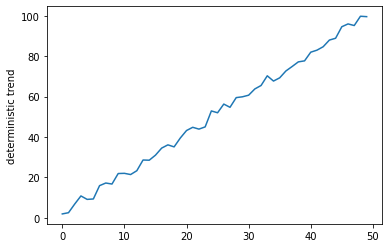

array([ 1.9,  2.5,  6.8, 10.8,  9.1,  9.3, 15.9, 17.2, 16.7, 21.9, 22. ,
       21.4, 23.3, 28.6, 28.5, 31. , 34.5, 36.1, 35.1, 39.5, 43.2, 44.8,
       43.9, 45. , 52.9, 52. , 56.3, 54.7, 59.5, 59.9, 60.7, 63.8, 65.5,
       70.3, 67.7, 69.3, 72.7, 74.9, 77.2, 77.7, 82. , 83. , 84.7, 88. ,
       88.9, 94.6, 96. , 95.2, 99.8, 99.6])

In [4]:

deterministic_trend_set = deterministic_trend(begin=4,variance=3,sample_size=sample_size,drift=2,trend =2)
plot_series(deterministic_trend_set,"deterministic trend")
deterministic_trend_set

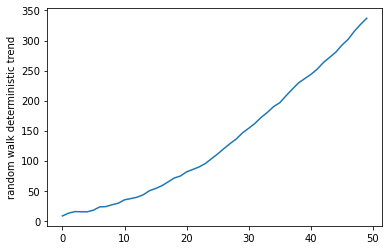

array([  8.2,  12.8,  15.4,  15.1,  15. ,  17.8,  23.2,  23.7,  26.8,
        29.4,  35. ,  37. ,  39.3,  43.3,  50.1,  53.8,  58.4,  64.7,
        71.3,  74.6,  81.6,  85.5,  89.7,  95.3, 103.4, 111.4, 120.2,
       128.6, 136.3, 146.5, 154.1, 162.2, 172.2, 180.5, 190.1, 196.6,
       208.1, 218.9, 229.4, 236.6, 243.6, 252.2, 263.2, 271.9, 280.5,
       292.4, 302. , 315.5, 326.9, 337.1])

In [33]:
deterministic_trend_random_walk_set = deterministic_trend_random_walk(begin=4,variance=3,sample_size=sample_size,drift=2,trend =0.2)
plot_series(deterministic_trend_random_walk_set,"random walk deterministic trend")

deterministic_trend_random_walk_set

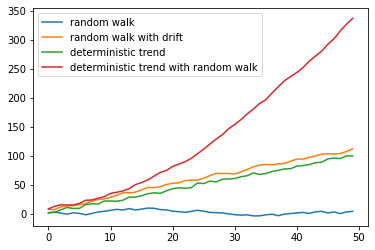

In [34]:
series = [random_walk_set,random_with_drift_set,deterministic_trend_set,deterministic_trend_random_walk_set]
labels = ["random walk","random walk with drift","deterministic trend","deterministic trend with random walk"]
for index,serie in enumerate(series):
  plt.plot(serie,label=labels[index])
plt.legend()  
plt.show()

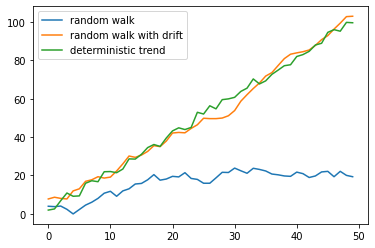

In [10]:
series = [random_walk_set,random_with_drift_set,deterministic_trend_set]
labels = ["random walk","random walk with drift","deterministic trend"]
for index,serie in enumerate(series):
  plt.plot(serie,label=labels[index])
plt.legend()  
plt.show()